On définit une suite de Collatz comme une suite d'entiers positifs satisfaisant :
$$\forall n\geq 0,\qquad u_{n+1}=
\begin{cases}
\frac{u_n}{2} & \text{ si $u_n$ est pair }\\
3u_n+1 & \text{ sinon.}
\end{cases}
$$

On constate empiriquement que l'on finit toujours par tomber sur le cycle
$$4 \mapsto 2 \mapsto 1\mapsto 4 \mapsto 2 \mapsto 1\mapsto 4 \mapsto 2 \mapsto 1\mapsto 4 \mapsto 2 \mapsto 1\mapsto 4 \mapsto 2 \mapsto 1 \ldots$$

Cela reste une conjecture depuis au moins 80 ans...

# Calcul de la suite

In [1]:
def suivant(x):
    """Calcul le terme suivant de la suite de Collatz."""
    if x%2 == 0:
        return x//2
    else:
        return 3*x+1

On va ici construire un générateur de la suite de Collatz. On arrête la suite une fois la valeur 1 atteinte car alors on va obtenir le cycle 4 2 1.

In [8]:
def suite(u0):
    """Générateur de la suite de Collatz jusqu'à la première valeur 1"""
    nombre=u0
    yield nombre
    while nombre !=1:
        nombre=suivant(nombre)
        yield nombre

In [23]:
def affichage(u0):
    """Affichage en ligne des éléments de la suite de Collatz"""
    return " ".join(str(nb) for nb in suite(u0))

In [11]:
import random as rd

In [26]:
def aleatoire(n=100):
    initiale=rd.randint(1, n)
    print(affichage(initiale))

In [27]:
aleatoire()

76 38 19 58 29 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1


In [28]:
aleatoire()

86 43 130 65 196 98 49 148 74 37 112 56 28 14 7 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1


In [29]:
aleatoire()

22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1


On constate ici que pour différentes données initiales on finit toujours par obtenir la suite périodique 4 2 1.

# Temps de vol des solutions.

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import numpy as np

In [48]:
import seaborn as sns

/home/vincent/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [49]:
plt.rc('figure', figsize=(12, 9))

In [30]:
def tempsNaif(u0):
    """Calcul le temps de vol en partant de u0"""
    return sum(1 for i in suite(u0))

In [54]:
def essai(ini):
    print(affichage(ini))
    return tempsNaif(ini)

In [55]:
essai(4)

4 2 1


3

In [56]:
essai(10)

10 5 16 8 4 2 1


7

In [57]:
essai(13)

13 40 20 10 5 16 8 4 2 1


10

In [58]:
def tableau(n=100):
    """Retourne le dictionnaire associant le temps de vol à la donnée initiale celle-ci allant de 1 à n"""
    resultats=dict()
    for ini in range(1,n+1):
        resultats[ini]=tempsNaif(ini)
        
    return resultats
        

In [63]:
%time res=tableau()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.27 ms


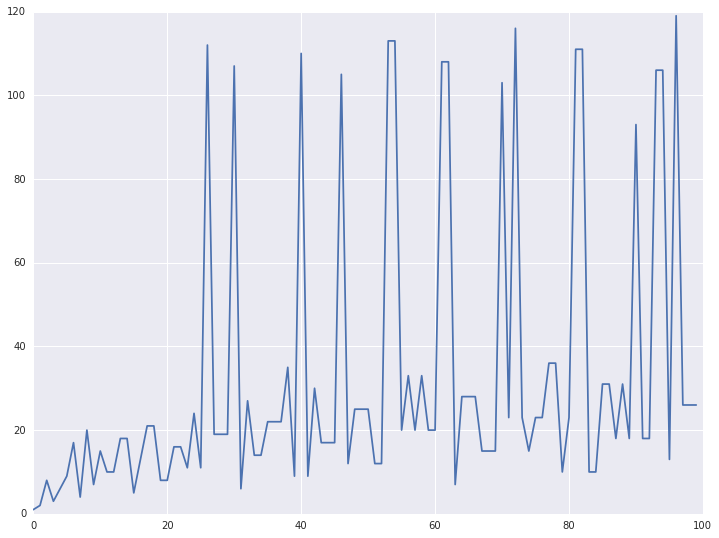

In [64]:
plt.plot(np.fromiter(res.values(), dtype=int))

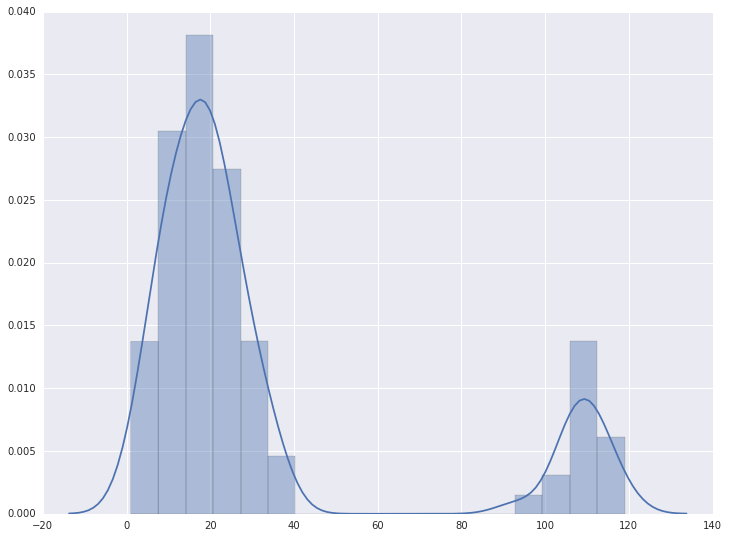

In [66]:
sns.distplot(np.fromiter(res.values(), dtype=int))

CPU times: user 444 ms, sys: 0 ns, total: 444 ms
Wall time: 446 ms


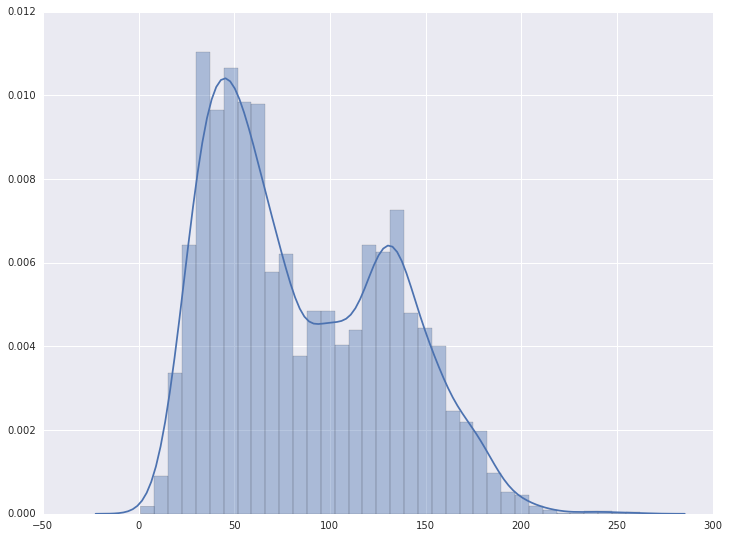

In [68]:
%%time
sns.distplot(np.fromiter(tableau(10000).values(), dtype=int))

In [61]:
np.fromiter(tableau(100).values(), dtype=int)

array([  1,   2,   8,   3,   6,   9,  17,   4,  20,   7,  15,  10,  10,
        18,  18,   5,  13,  21,  21,   8,   8,  16,  16,  11,  24,  11,
       112,  19,  19,  19, 107,   6,  27,  14,  14,  22,  22,  22,  35,
         9, 110,   9,  30,  17,  17,  17, 105,  12,  25,  25,  25,  12,
        12, 113, 113,  20,  33,  20,  33,  20,  20, 108, 108,   7,  28,
        28,  28,  15,  15,  15, 103,  23, 116,  23,  15,  23,  23,  36,
        36,  10,  23, 111, 111,  10,  10,  31,  31,  18,  31,  18,  93,
        18,  18, 106, 106,  13, 119,  26,  26,  26])